# Face Mask Detection using CNN

In [5]:
!pip install opendatasets

In [6]:
import opendatasets as od

In [7]:
od.download('https://www.kaggle.com/datasets/omkargurav/face-mask-dataset')

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset


100%|██████████| 163M/163M [00:00<00:00, 1.52GB/s]

In [8]:
!ls

face-mask-dataset  kaggle.json	sample_data


Importing the dependencies

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from cv2 import imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/face-mask-dataset/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3352.jpg', 'with_mask_3069.jpg', 'with_mask_3316.jpg', 'with_mask_3683.jpg', 'with_mask_3111.jpg']
['with_mask_2079.jpg', 'with_mask_2468.jpg', 'with_mask_360.jpg', 'with_mask_790.jpg', 'with_mask_118.jpg']


In [11]:
without_mask_files = os.listdir('/content/face-mask-dataset/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3811.jpg', 'without_mask_3186.jpg', 'without_mask_3148.jpg', 'without_mask_1811.jpg', 'without_mask_269.jpg']
['without_mask_254.jpg', 'without_mask_3640.jpg', 'without_mask_61.jpg', 'without_mask_1979.jpg', 'without_mask_226.jpg']


In [12]:
print("Number of Mask Images :",len(with_mask_files))
print("Number of Without Mask Images :",len(without_mask_files))

Number of Mask Images : 3725
Number of Without Mask Images : 3828


Create Labels For the Images

####1 --> for with mask
####0 --> for without mask

In [13]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
labels = with_mask_labels + without_mask_labels
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying Images

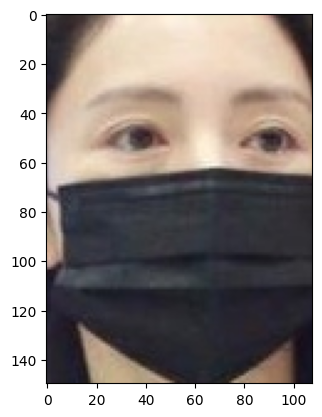

In [16]:
#with mask
img = mping.imread('/content/face-mask-dataset/data/with_mask/with_mask_35.jpg')
imgplot = plt.imshow(img)
plt.show()

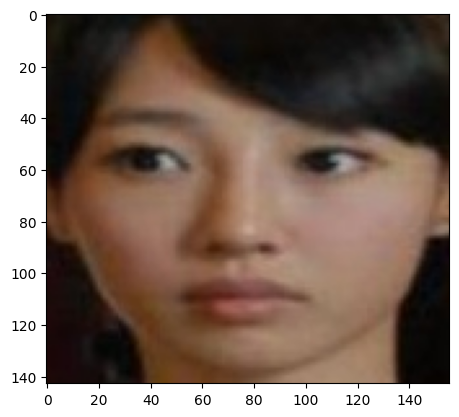

In [17]:
#without mask
img = mping.imread('/content/face-mask-dataset/data/without_mask/without_mask_2224.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1.resizing the image
#####2.convert the image into numpy array

In [18]:
# convert images into numpy arrays

with_mask_path = '/content/face-mask-dataset/data/with_mask/'
data = []

for image_file in with_mask_files:
  image = Image.open(with_mask_path + image_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/face-mask-dataset/data/without_mask/'

for image_file in without_mask_files:
  image = Image.open(without_mask_path + image_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
print(data[0].shape)

(128, 128, 3)


In [20]:
type(data)

list

converting Image list and labels list into numpy array

In [21]:
x = np.array(data)
y = np.array(labels)

In [22]:
type(x)

numpy.ndarray

In [23]:
type(y)

numpy.ndarray

In [24]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


# splitind the data for train and test

In [25]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
print(x.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


scaling the data

In [27]:
x_train_s = X_train/255

x_test_s = X_test/255


In [28]:
print(x_train_s[0])

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


Creating the convolution Neural Network (CNN)

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
No_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(No_of_classes,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the model

In [31]:
model.compile(
    optimizer='adam',
    loss="SparseCategoricalCrossentropy",
    metrics=['accuracy']
)

Training the model

In [32]:
history = model.fit(x_train_s,y_train,epochs=5,validation_split=0.1)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.5913 - loss: 0.7459 - val_accuracy: 0.8711 - val_loss: 0.3120
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8820 - loss: 0.3213 - val_accuracy: 0.8860 - val_loss: 0.2781
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8980 - loss: 0.2589 - val_accuracy: 0.9058 - val_loss: 0.2375
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9348 - loss: 0.1911 - val_accuracy: 0.8992 - val_loss: 0.2436
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9403 - loss: 0.1588 - val_accuracy: 0.9091 - val_loss: 0.2376


Model Evaluation

In [33]:
loss,accuracy = model.evaluate(x_test_s,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9195 - loss: 0.2300


In [34]:
print('Evaluation Accuracy :',accuracy)

Evaluation Accuracy : 0.9166114926338196


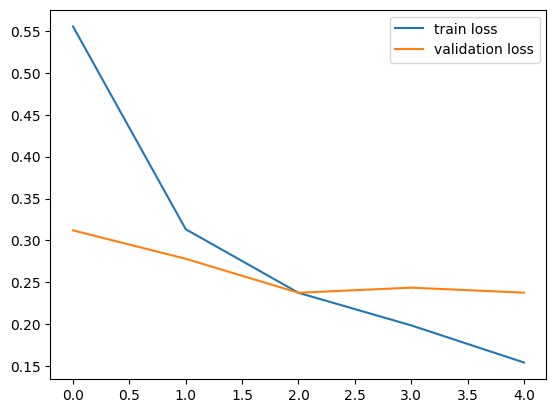

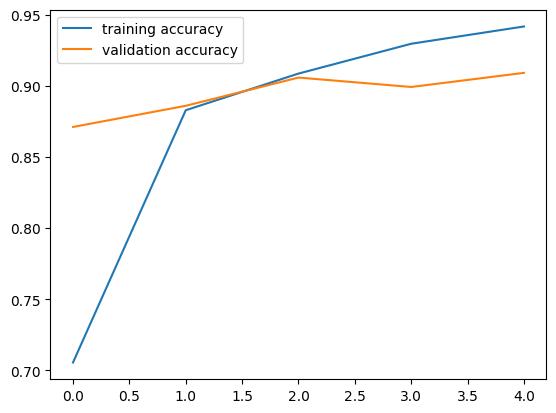

In [35]:
h = history

#plotting the loss
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


#ploting the Accuracy
plt.plot(h.history['accuracy'],label='training accuracy')
plt.plot(h.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

In [37]:
model.save("Face_Mask_detection_Model.keras")